In [ ]:
#睡眠数据集导入

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 读取模拟数据
df = pd.read_csv("Sleep_Efficiency.csv")
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
# 列名转换为中文
column_map = {
    'ID': 'ID',
    'Age': '年龄',
    'Gender': '性别',
    'Bedtime': '入睡时间',
    'Wakeup time': '醒来时间',
    'Sleep duration': '睡眠时长(小时)',
    'Sleep efficiency': '睡眠效率',
    'REM sleep percentage': 'REM睡眠占比(%)',
    'Deep sleep percentage': '深度睡眠占比(%)',
    'Light sleep percentage': '浅度睡眠占比(%)',
    'Awakenings': '夜间觉醒次数',
    'Caffeine consumption': '咖啡因摄入量(mg)',
    'Alcohol consumption': '酒精摄入量(份)',
    'Smoking status': '吸烟状态',
    'Exercise frequency': '锻炼频率(次/周)'
}
df = df.rename(columns=column_map)
df.head()

,ID,年龄,性别,入睡时间,醒来时间,睡眠时长(小时),睡眠效率,REM睡眠占比(%),深度睡眠占比(%),浅度睡眠占比(%),夜间觉醒次数,咖啡因摄入量(mg),酒精摄入量(份),吸烟状态,锻炼频率(次/周)
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
# 数据预处理
# 转换日期时间类型
df['入睡时间'] = pd.to_datetime(df['入睡时间'])
df['醒来时间'] = pd.to_datetime(df['醒来时间'])

# 提取日期特征
df['入睡小时'] = df['入睡时间'].dt.hour
df['醒来小时'] = df['醒来时间'].dt.hour
df['睡眠周期'] = (df['醒来时间'] - df['入睡时间']).dt.total_seconds() / 3600

df.head()

,ID,年龄,性别,入睡时间,醒来时间,睡眠时长(小时),睡眠效率,REM睡眠占比(%),深度睡眠占比(%),浅度睡眠占比(%),夜间觉醒次数,咖啡因摄入量(mg),酒精摄入量(份),吸烟状态,锻炼频率(次/周),入睡小时,醒来小时,睡眠周期
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,7,6.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2,9,7.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,21,5,-16.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2,8,6.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,9,8.0


In [6]:
# 处理缺失值
df['咖啡因摄入量(mg)'] = df['咖啡因摄入量(mg)'].fillna(0)
df['酒精摄入量(份)'] = df['酒精摄入量(份)'].fillna(0)
df['夜间觉醒次数'] = df['夜间觉醒次数'].fillna(df['夜间觉醒次数'].median())
df['锻炼频率(次/周)'] = df['锻炼频率(次/周)'].fillna(df['锻炼频率(次/周)'].median())

In [7]:
# 特征工程
# 创建新特征：睡眠时间一致性
df['入睡时间标准差'] = df.groupby('ID')['入睡小时'].transform('std')
# 创建新特征：是否熬夜（入睡时间晚于23点）
df['熬夜'] = df['入睡小时'].apply(lambda x: 1 if x >= 23 else 0)

In [11]:
#让图注正确显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

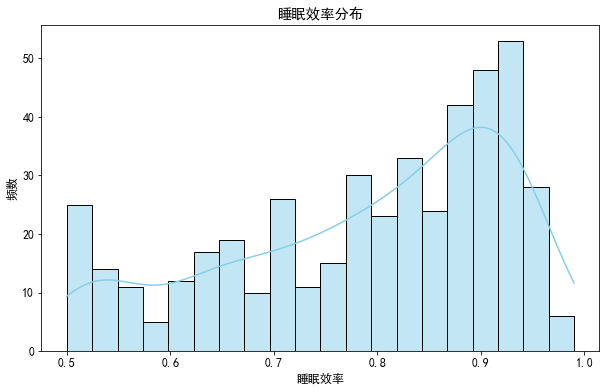

In [12]:
# 数据可视化
# 1. 睡眠效率分布
plt.figure(figsize=(10, 6))
sns.histplot(df['睡眠效率'], kde=True, bins=20, color='skyblue')
plt.title('睡眠效率分布')
plt.xlabel('睡眠效率')
plt.ylabel('频数')
plt.show()

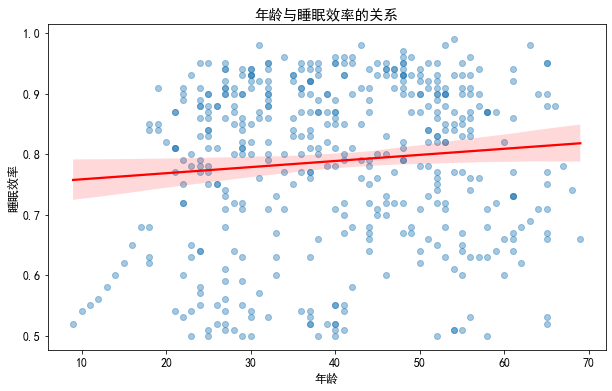

In [13]:
# 2. 年龄与睡眠效率的关系
plt.figure(figsize=(10, 6))
sns.regplot(x='年龄', y='睡眠效率', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('年龄与睡眠效率的关系')
plt.show()

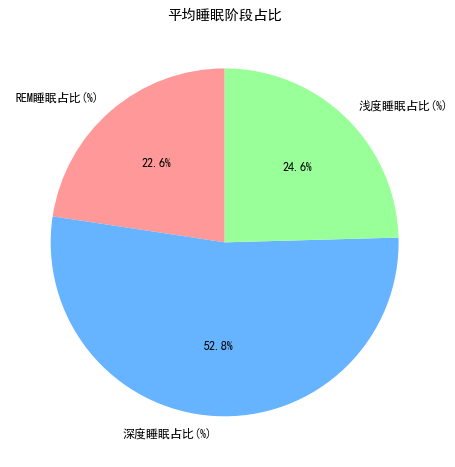

In [14]:
# 3. 睡眠阶段占比
sleep_stages = df[['REM睡眠占比(%)', '深度睡眠占比(%)', '浅度睡眠占比(%)']].mean()
plt.figure(figsize=(8, 8))
plt.pie(sleep_stages, labels=sleep_stages.index, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title('平均睡眠阶段占比')
plt.show()

C:\Users\51387\AppData\Local\Temp\ipykernel_38512\2183263019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifestyle['吸烟状态'] = lifestyle['吸烟状态'].map({'Yes':1, 'No':0})


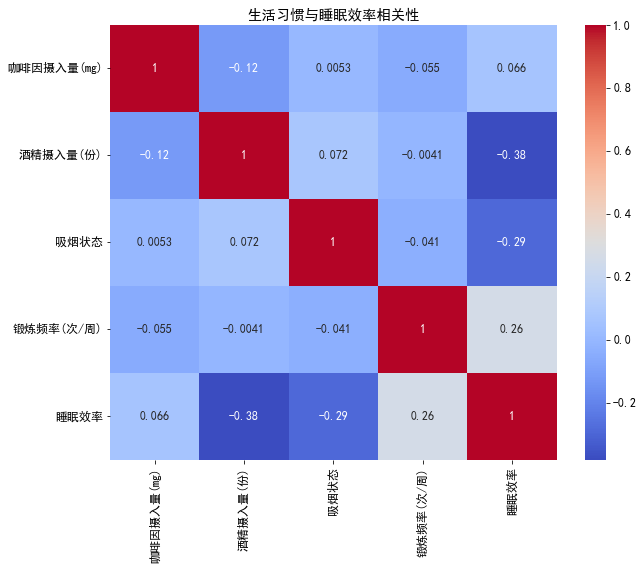

In [15]:
# 4. 生活习惯热力图
lifestyle = df[['咖啡因摄入量(mg)', '酒精摄入量(份)', '吸烟状态', '锻炼频率(次/周)', '睡眠效率']]
lifestyle['吸烟状态'] = lifestyle['吸烟状态'].map({'Yes':1, 'No':0})
plt.figure(figsize=(10, 8))
sns.heatmap(lifestyle.corr(), annot=True, cmap='coolwarm')
plt.title('生活习惯与睡眠效率相关性')
plt.show()

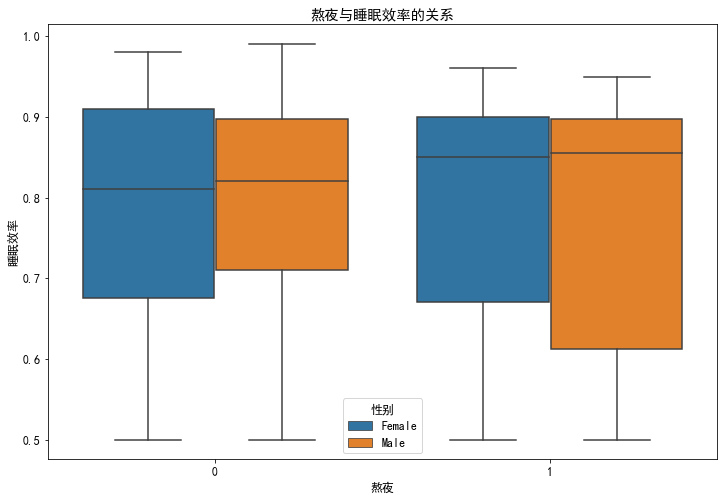

In [16]:
# 5. 多因素箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='熬夜', y='睡眠效率', hue='性别', data=df)
plt.title('熬夜与睡眠效率的关系')
plt.show()

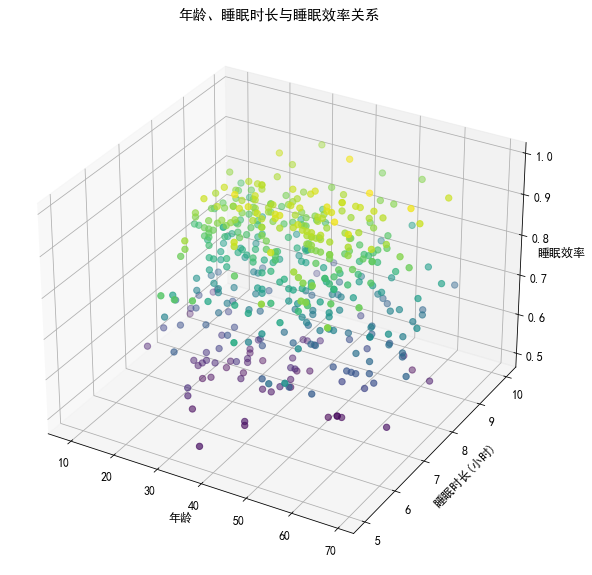

In [17]:
# 6. 3D散点图（需要安装mpl_toolkits）
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['年龄'], df['睡眠时长(小时)'], df['睡眠效率'], 
           c=df['睡眠效率'], cmap='viridis', s=40)
ax.set_xlabel('年龄')
ax.set_ylabel('睡眠时长(小时)')
ax.set_zlabel('睡眠效率')
plt.title('年龄、睡眠时长与睡眠效率关系')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
# 特征工程与机器学习
# 准备特征和目标变量
X = df[['年龄', '性别', '睡眠时长(小时)', 'REM睡眠占比(%)', 
       '深度睡眠占比(%)', '浅度睡眠占比(%)', '夜间觉醒次数', 
       '咖啡因摄入量(mg)', '酒精摄入量(份)', '吸烟状态', 
       '锻炼频率(次/周)', '入睡小时', '熬夜']]
y = df['睡眠效率']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [20]:
# 创建预处理管道
numeric_features = ['年龄', '睡眠时长(小时)', 'REM睡眠占比(%)', 
                   '深度睡眠占比(%)', '浅度睡眠占比(%)', '夜间觉醒次数',
                   '咖啡因摄入量(mg)', '酒精摄入量(份)', '锻炼频率(次/周)', '入睡小时']
categorical_features = ['性别', '吸烟状态', '熬夜']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [21]:
# 创建随机森林模型
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, 
                                      random_state=42, 
                                      max_depth=8,
                                      min_samples_split=5))
])

# 训练模型
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['年龄', '睡眠时长(小时)',
                                                   'REM睡眠占比(%)', '深度睡眠占比(%)',
                                                   '浅度睡眠占比(%)', '夜间觉醒次数',
                                                   '咖啡因摄入量(mg)', '酒精摄入量(份)',
                                                   '锻炼频率(次/周)', '入睡小时']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                          

In [22]:
# 预测与评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"模型评估结果:")
print(f"均方误差(MSE): {mse:.4f}")
print(f"决定系数(R²): {r2:.4f}")

模型评估结果:
均方误差(MSE): 0.0026
决定系数(R²): 0.8629


In [23]:
# 特征重要性分析
# 提取特征名称
feature_names = numeric_features + \
               list(model.named_steps['preprocessor']
                   .named_transformers_['cat']
                   .named_steps['onehot']
                   .get_feature_names_out(categorical_features))

# 提取特征重要性
importances = model.named_steps['regressor'].feature_importances_

In [24]:
# 创建特征重要性DataFrame
importance_df = pd.DataFrame({
    '特征': feature_names,
    '重要性': importances
}).sort_values('重要性', ascending=False).head(15)

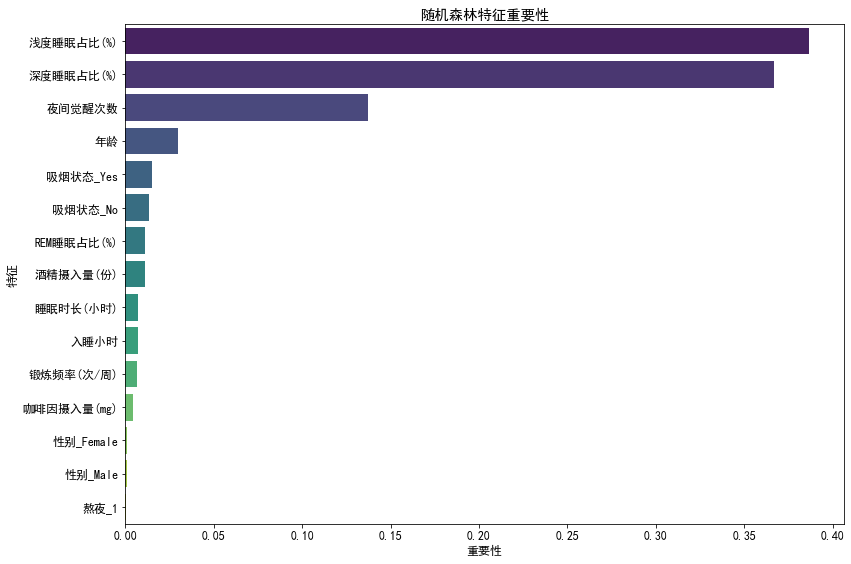

In [25]:
# 可视化特征重要性
plt.figure(figsize=(12, 8))
sns.barplot(x='重要性', y='特征', data=importance_df, palette='viridis')
plt.title('随机森林特征重要性')
plt.tight_layout()
plt.show()

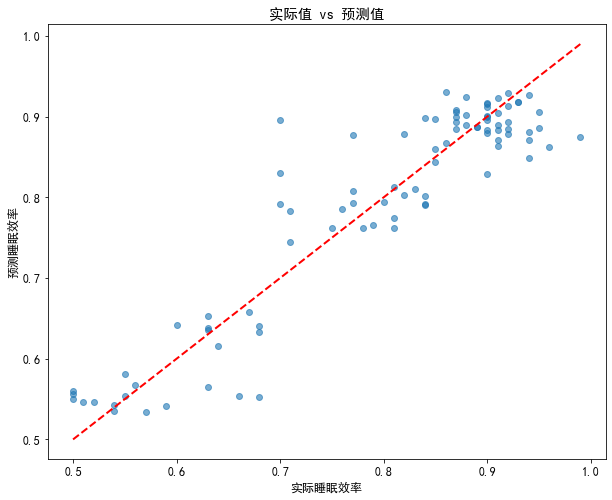

In [26]:
# 实际值 vs 预测值 散点图
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('实际睡眠效率')
plt.ylabel('预测睡眠效率')
plt.title('实际值 vs 预测值')
plt.show()

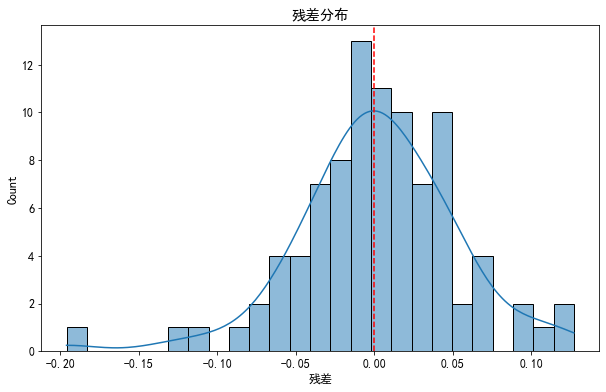

In [27]:
# 残差图
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=25)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('残差')
plt.title('残差分布')
plt.show()